# 21회 모의고사 
<br>

##  2. 통계분석 (50점) 


<br>
2. 회귀분석 문제. DATA = boston data (연속형 독립변수 1개, 종속변수 1개로 구성된 보스턴 집값 데이터셋)  (총 29점 ) <br>
2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오<br> <br>
2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오. <br>

alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br> <br>
2-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.<br>
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br>


In [1]:
import pandas as pd 
import numpy as np 
import mglearn
X,y = mglearn.datasets.load_extended_boston()
# 훈련, 테스트 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## 2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오<br>

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso

lr = LinearRegression() 
lr.fit(X_train,y_train)

## R2 
print("선형회귀 결정계수 : ", lr.score(X_test,y_test))
print("선형회귀 RMSE : ", np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

선형회귀 결정계수 :  0.6158858584078475
선형회귀 RMSE :  5.592657237078841


sklearn의 LinearRegression을 통해 선형회귀모델을 만들고 20% test데이터셋으로 모델을 검증하였다.

모델의 정확도는 약 61.5%이며, RMSE 값은 약 5.6 이었다. 이는 모델이 예측할 때 실제 값과의 차이가 약 5.6정도 난다는 의미이다. 

## 2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오. <br>
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br>

In [3]:
alpha = np.arange(0,1.1,0.1)

ridge = Ridge(normalize=True) 
param_grid = {'alpha':alpha}
ridge_model = GridSearchCV(ridge, param_grid)
ridge_model.fit(X_train,y_train)

print(ridge_model.best_params_)
print("릿지회귀 결정계수 : ", ridge_model.score(X_test,y_test))
print("릿지회귀 RMSE : ", np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test))))

{'alpha': 0.1}
릿지회귀 결정계수 :  0.7356090234954484
릿지회귀 RMSE :  4.639929365714193


우선, GridSearchCV 함수를 활용하여 alpha를 0.1부터 1까지 적용시켜 최적의 모델을 찾아냈다. 

최적의 모델을 갖는 alpha 값은 0.1이었다. 

alpha값을 조정하여 모델의 학습 정도를 조절할 수 있으며 평가지표로는 R2와 RMSE가 사용된다. 

alpha=1의 모델로 test 데이터를 예측하여 검증해본 결과 R2는 약 0.735, RMSE는 약 4.6으로 나타났다. 

## 2-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.<br>
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br>

In [4]:
lasso = Lasso(normalize=True) 
param_grid = {'alpha':alpha}
lasso_model = GridSearchCV(lasso, param_grid)
lasso_model.fit(X_train,y_train)

print(lasso_model.best_params_)
print("라쏘회귀 결정계수 : ", lasso_model.best_estimator_.score(X_test,y_test))
print("라쏘회귀 RMSE : ", np.sqrt(mean_squared_error(y_test, lasso_model.best_estimator_.predict(X_test))))

C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 749.6117813682623, tolerance: 2.837745529411765
  positive)
C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  

{'alpha': 0.0}
라쏘회귀 결정계수 :  0.6901880385280015
라쏘회귀 RMSE :  5.022698918447145


C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1040.4848910693343, tolerance: 3.4398062970297034
  positive)


# 21회 기출분석 (4) 

2. 독립변수 하나 종속변수 하나 소규모 데이터 다항회귀(12점)<br>
다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요. <br>
<br><br>
3. ANOVA분석 (9점)<br>
변수 3개(하나는 범주형 변수/ 나머지 두 개는 수치형 연속변수)<br>
이원분산분석을 수행하고 통계표를 작성하시오.<br>


In [6]:
import pandas as pd
import numpy as np

## 데이터 불러오기 
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 3 * X**3  + X**2 + 2*X + 2 + np.random.randn(m,1)  #노이즈 포함

line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)


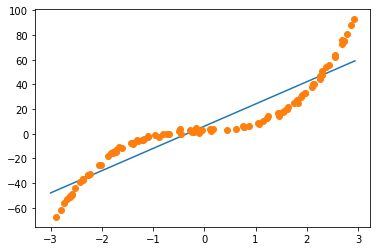

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line))
plt.plot(X[:,0], y, 'o')


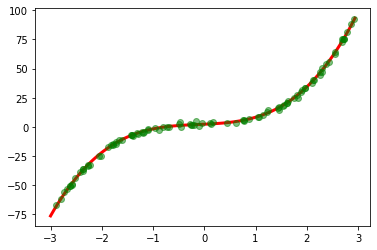

In [8]:
from sklearn.preprocessing import PolynomialFeatures
## x**3 까지 3차항을 적용시켜야 함 
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
line_poly = poly.transform(line)
reg = LinearRegression().fit(X_poly, y)
plt.plot(line, reg.predict(line_poly), c='r',linewidth=3)
plt.plot(X,y,'o',c = 'g', alpha=0.5)

In [9]:
reg.coef_

array([[1.98734876, 0.97201636, 3.01978865]])

## 3. ANOVA분석 (9점)<br>
변수 3개(하나는 수치형 변수/ 나머지 두 개는 범주형 변수)<br>
이원분산분석을 수행하고 통계표를 작성하시오.<br>

분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A,B의 영향을 알아보기 위해 사용되는 검증 방법이다.

- <b>가. 상호작용효과 검정에 대한 가설</b><br>
1) 귀무가설 H0: region과 avocado type 간에는 상호작용 효과가 없다. <br>
2) 대립가설 H1: region과 avocado type 간에는 상호작용 효과가 있다. <br>


- <b>나. 주효과 검정에 대한 가설</b> <br>
1) 귀무가설 H0: region 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
2) 대립가설 H1: region 종류에 따른 AveragePrice 차이는 존재한다. <br> 
3) 귀무가설 H0: type 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
4) 대립가설 H1: type 종류에 따른 AveragePrice 차이는 존재한다. <br> 
<br> 


In [1]:
import pandas as pd
import numpy as np
avocado = pd.read_csv('../data/avocado.csv')
avocado = avocado[["AveragePrice","type","region"]]
avocado = avocado[(avocado['region']=='Orlando') | (avocado['region']=='Boston' )| (avocado['region']=='Chicago')].reset_index(drop=True)
avocado


,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


In [2]:
## 독립변수 type,region 종속변수 AveragePrice 을 Series로 변경 

AveragePrice = avocado["AveragePrice"]
avocado_type = avocado["type"]
region = avocado["region"]

## 분산분석 수행 

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'AveragePrice ~C(avocado_type)*C(region)' 
model = ols(formula, avocado).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(avocado_type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(avocado_type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


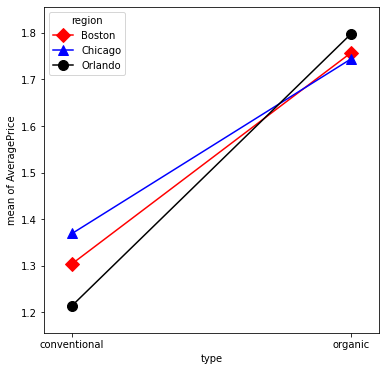

In [21]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(avocado_type, region , AveragePrice,colors=['red', 'blue', 'black'], markers=['D', '^','o'], ms=10, ax=ax)